In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Dataset

In [3]:
df=pd.read_csv('Travel.csv')

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Check nilai null

In [6]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom CustomerID sebanyak 0, dengan persentase 0.0%
Missing value pada kolom ProdTaken sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Age sebanyak 226, dengan persentase 4.62%
Missing value pada kolom TypeofContact sebanyak 25, dengan persentase 0.51%
Missing value pada kolom CityTier sebanyak 0, dengan persentase 0.0%
Missing value pada kolom DurationOfPitch sebanyak 251, dengan persentase 5.14%
Missing value pada kolom Occupation sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Gender sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfPersonVisiting sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfFollowups sebanyak 45, dengan persentase 0.92%
Missing value pada kolom ProductPitched sebanyak 0, dengan persentase 0.0%
Missing value pada kolom PreferredPropertyStar sebanyak 26, dengan persentase 0.53%
Missing value pada kolom MaritalStatus sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfT

## Check nilai duplicates

In [7]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Pendekatan Numerik

In [8]:
# Describe nilai kategori
df.select_dtypes(include='object').describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [9]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


Dari analysis deskriptif yang dilakukan dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null, yaitu `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome` dengan nilai null terbanyak ada pada kolom DurationOfPitch yaitu 5.14% dari total baris.
- terdapat outlier pada kolom `DurationOfPitch` dan `NumberofTrips` karena nilai max sangan jauh dari nilai Q3-nya.

# Univariate Analysis

In [10]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [11]:
print(f'Terdapat {len(num_cols)} numerical columns, yaitu {num_cols}')
print(f'Terdapat {len(cat_cols)} categorical columns, yaitu {cat_cols}')

Terdapat 14 numerical columns, yaitu ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Terdapat 6 categorical columns, yaitu ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


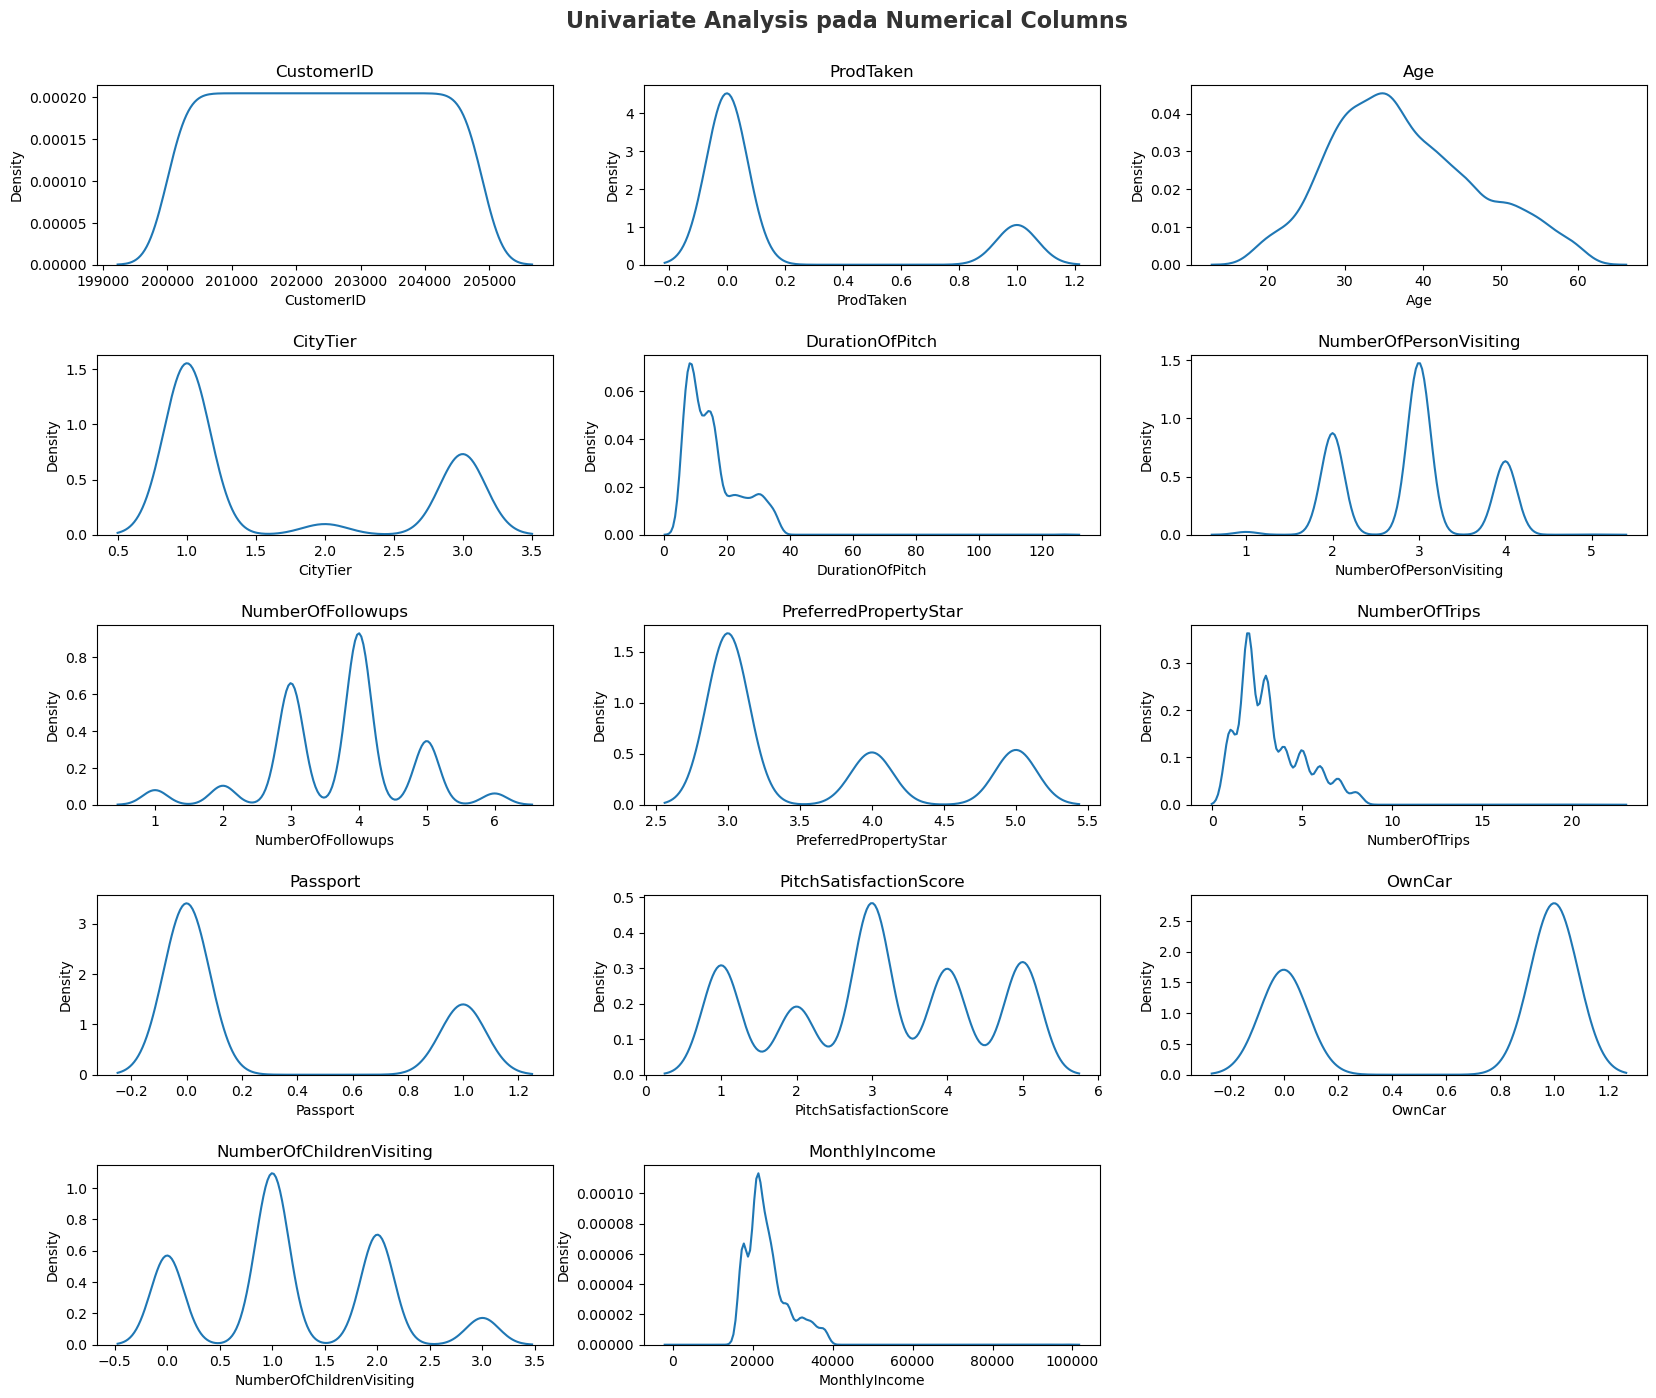

In [12]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.5, top=0.95)
plt.suptitle('Univariate Analysis pada Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(num_cols)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[num_cols[i]])
    plt.title(num_cols[i])
    plt.xlabel(num_cols[i])


Berdasarkan visualisasi diatas dapat disimpulkan bahwa:
- kolom `Age` mendekati distribusi normal
- kolom `DurationOfPitch`, `MonthlyIncome` dan `NumberOfTrips` membentuk distribusi positive skewed yang berarti terdapat outlier.
- untuk kolom lainnya dapat diabaikan karena termasuk jenis data diskrit atau ordinal.  

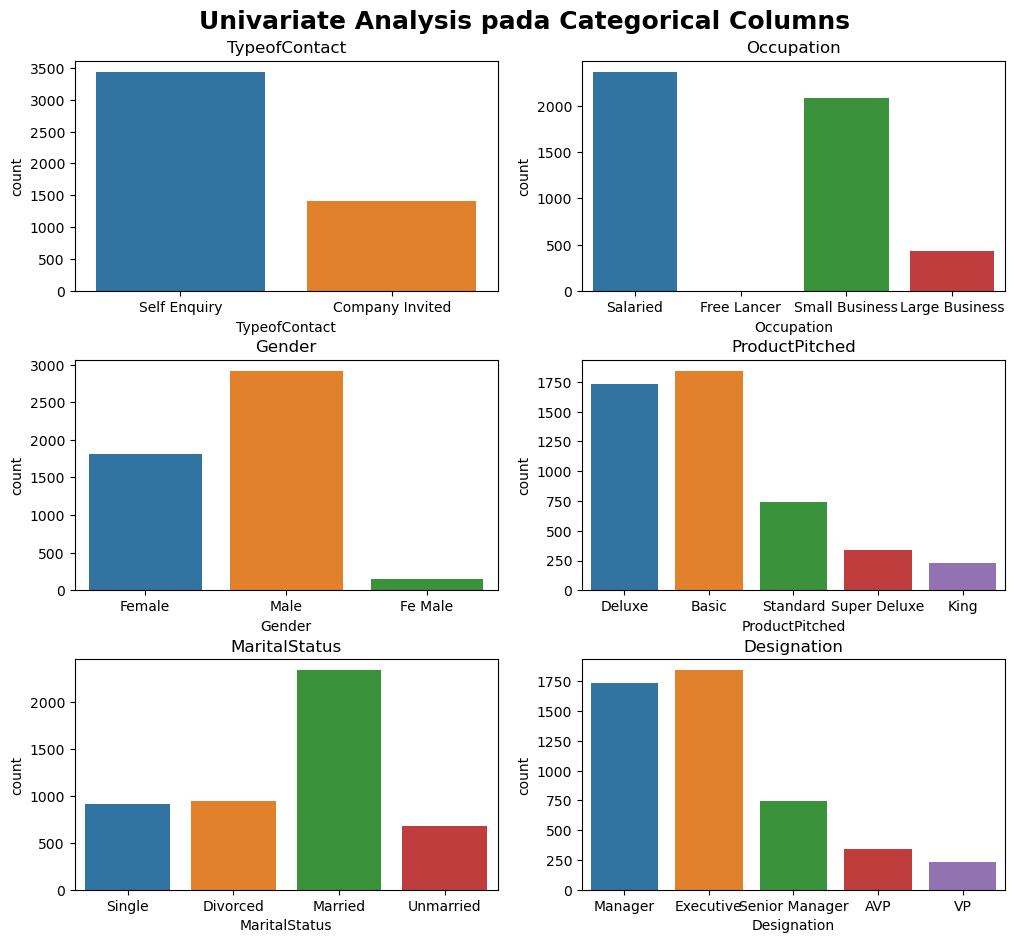

In [13]:
plt.figure(figsize=(12,17))
plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle('Univariate Analysis pada Categorical Columns', fontsize=18, fontweight='bold')
for i in range(len(cat_cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(cat_cols[i])
    plt.xlabel(cat_cols[i])

Berdasarkan hasi visualisasi diatas dapat disimpulkan bahwa:
- Pada kolom `TypeofContact` didominasi oleh self enquiry dengan proporsi lebih dari 50%
- Pada kolom `Occupation`  didominasi oleh dua kategori yaitu Salaried dan Small Business
- Pada kolom `Gender` jenis kelamin laki-laki lebih banyak dari perempuan, selain itu nilain Fe Male dapat diubah menjadi female
- Pada kolom `ProductPitched` didominasi oleh 2 kategori yaitu Deluxe dam basic
- Pada kolom `MaritalStatus` didominasi oleh Married, dan nilai Unmarried dapat diubah menjadi Single karena memiliki arti yang sama
-  pada kolom `Designation` didominasi oleh 2 kategori yaitu Manager dan Executive

# Multivariate Analysis

## Heatmap correlation

Text(0.5, 0.98, 'Heatmap Correlation')

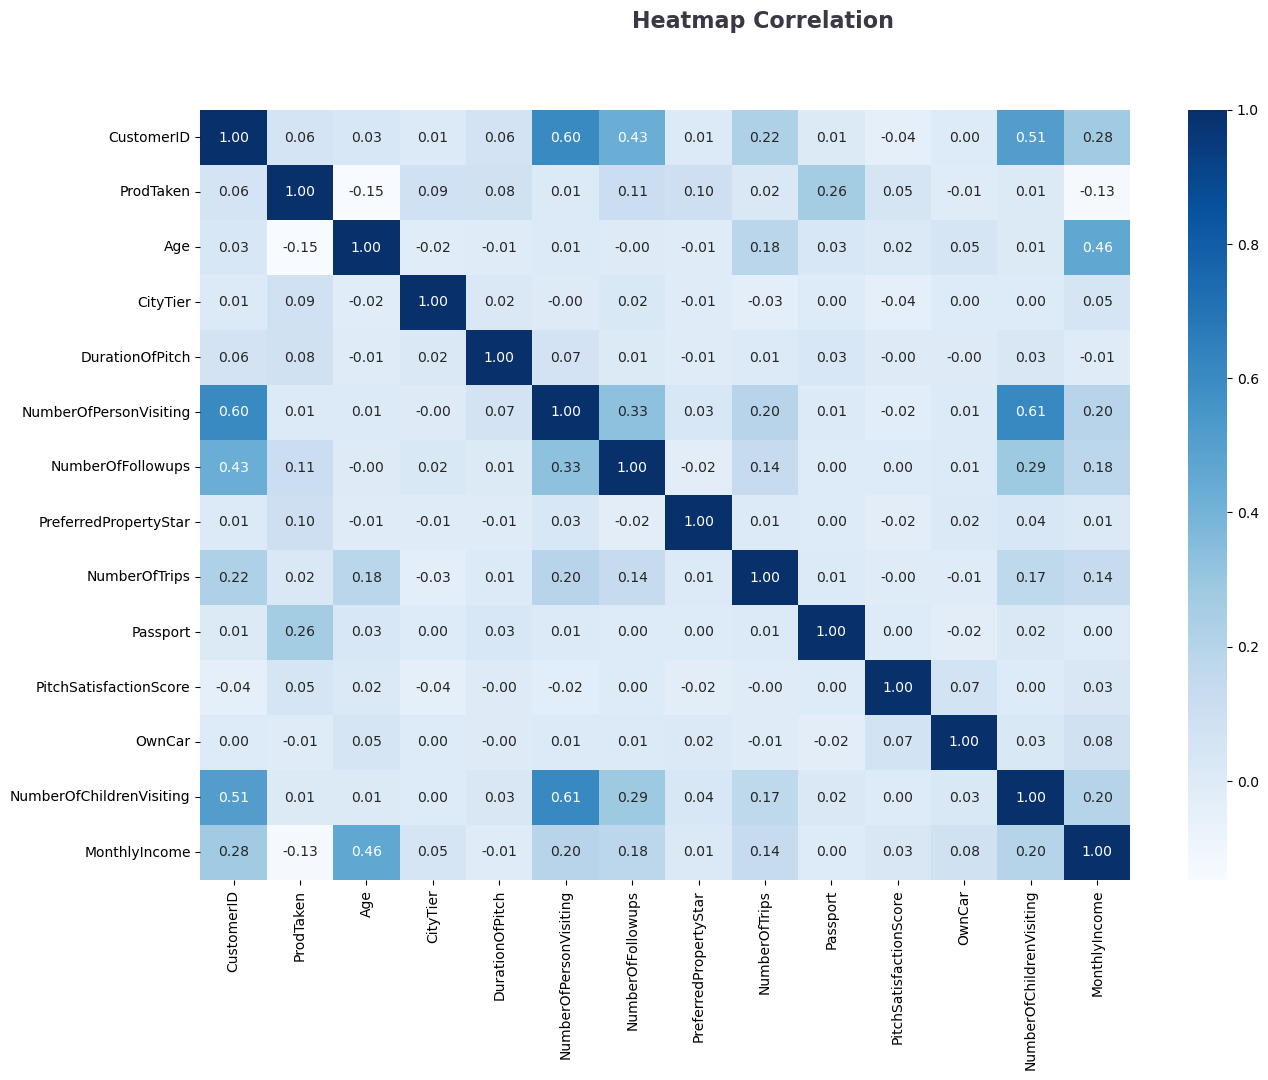

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)  

Berdasarakan visualisasi heatmap dapat diketahui bahwa:
- kolom target (`ProdTaken`) memiliki korelasi paling kuat dengan kolom Passport (0.26)
- kolom `NumberofPersonVisiting` dan kolom `NumberofChildrenVisiting` memiliki korelasi yang sangat tinggi (0.61) dan ada kemungkinan kolom tersebut redundant dan akan dipilih salah satu

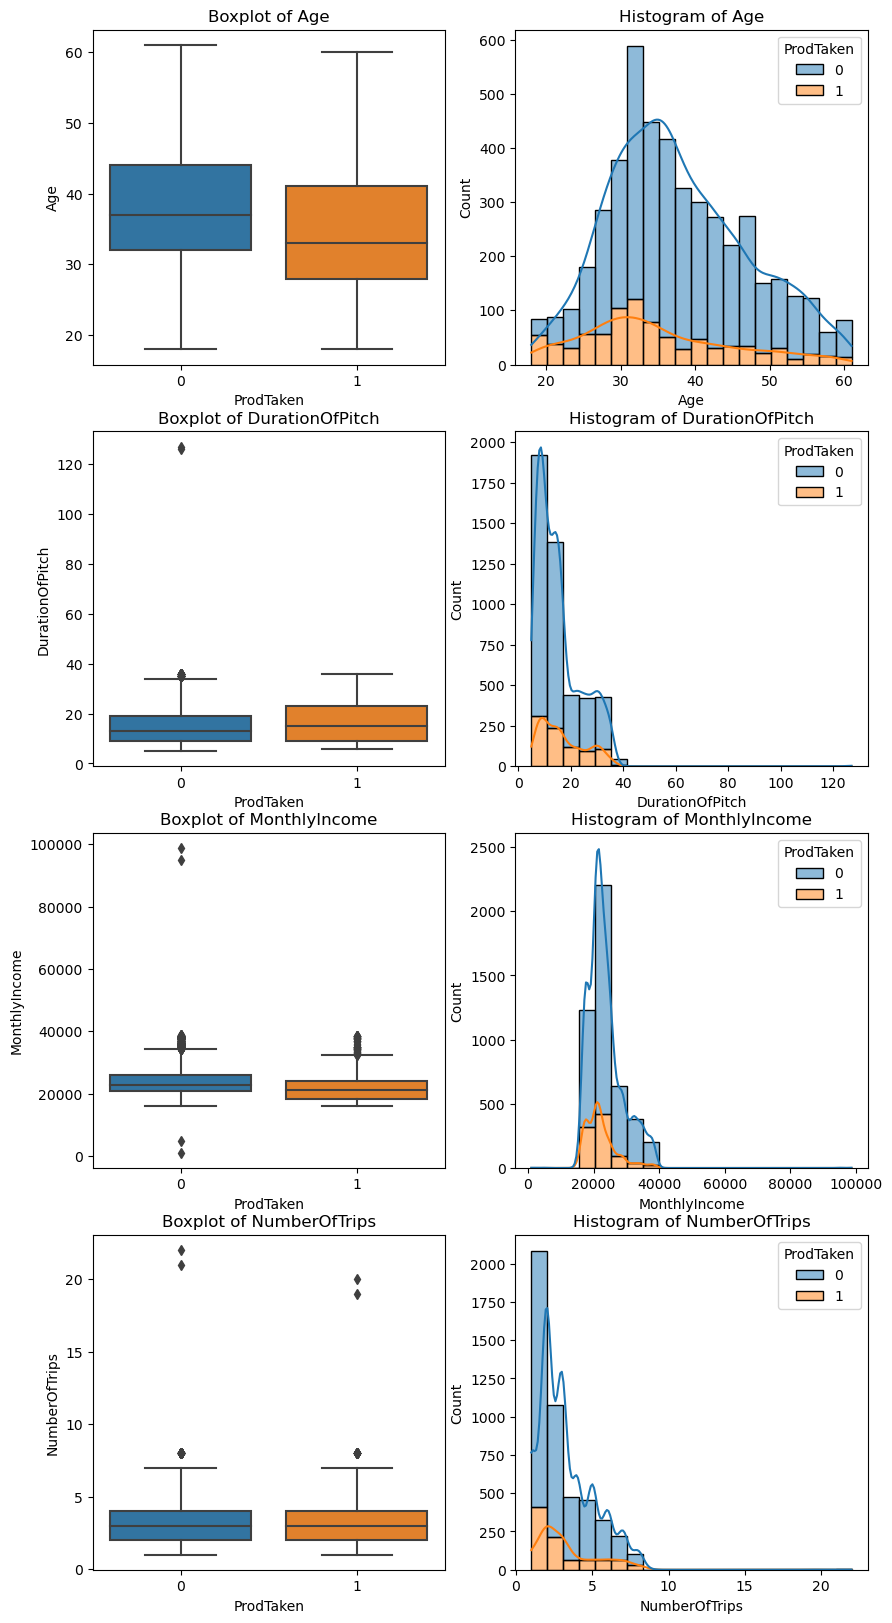

In [15]:
# EDA numerical features by target(ProdTaken)
num_cols2 = ['Age','DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

fig, ax = plt.subplots(4, 2, figsize=(10,20))

for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa:
- Umur customer yang membeli paket perjalanan berada pada retang 29-40 tahun
- Duration of pitch yang dilakukan sales selama kurang dari 20 menit akan meningkatkan kemungkinan customer mengambil paket perjalanan
- Customer dengan pendapatan bulanan sekitar 15000-25000 berkemungkinan lebih tertarik untuk membeli paket perjalanan
Customer yang membeli paket perjalanan tidak melelati lebih dari 5 kali perjalanan dalam satu tahun

In [16]:
cat_cols2 = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation']

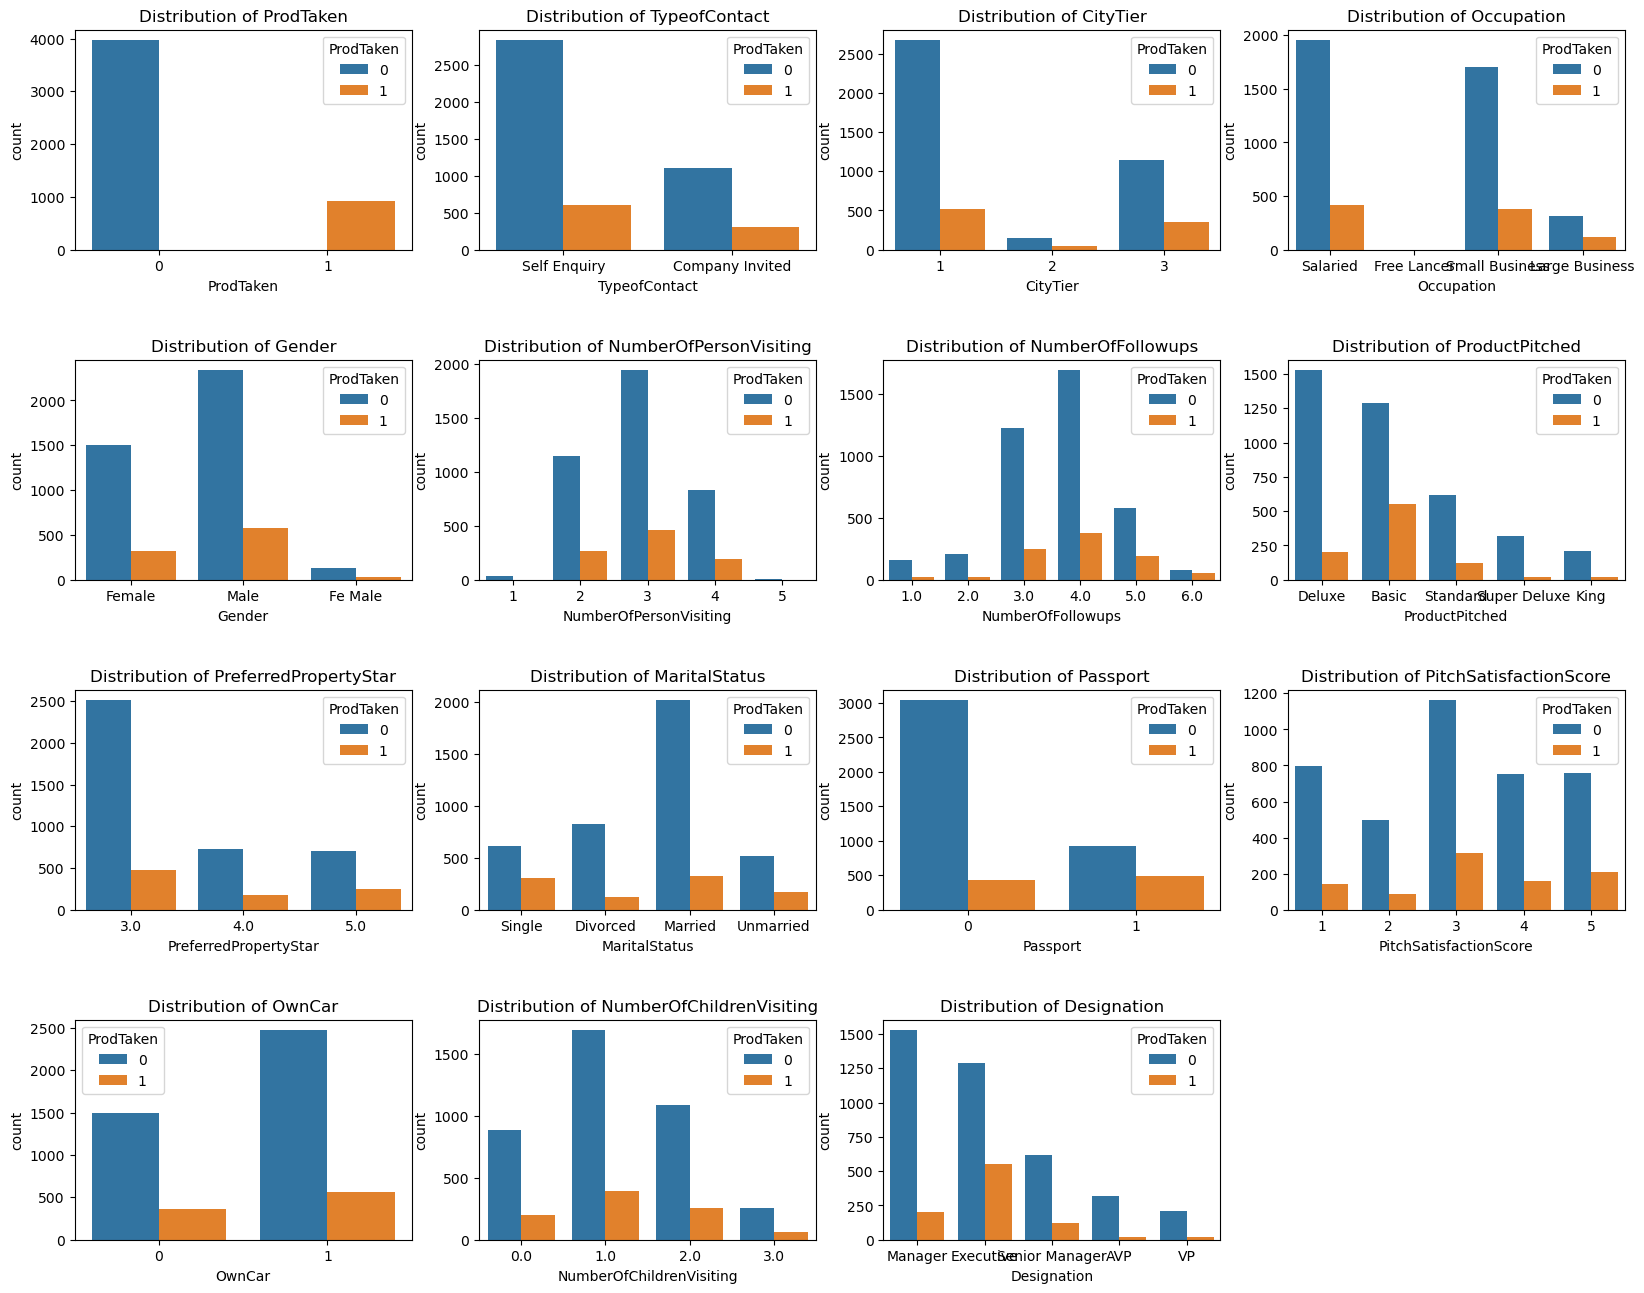

In [17]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat_cols2)):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=df, x=cat_cols2[i], hue='ProdTaken')
    plt.subplots_adjust(hspace=0.5)
    plt.title(f'Distribution of {cat_cols2[i]}', fontsize=12)
    

Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
- Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
- Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
- Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
- Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
- Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
- Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
- Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
- Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
- Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
- Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
- Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel


In [18]:
#Uji Hipotesis menggunakan chisquare pada kolom kategorikal terhadap target
#H0 : Tidak berkorelasi dengan target
#H1 : Berkorelasi dengan target

chi2_check = []
for i in cat_cols2:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[i]))[1] < 0.05:
        chi2_check.append('H1 diterima')
    else:
        chi2_check.append('H0 diterima')
result = pd.DataFrame(data=[cat_cols2, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,ProdTaken,H1 diterima
1,TypeofContact,H1 diterima
2,CityTier,H1 diterima
3,Occupation,H1 diterima
4,Gender,H0 diterima
5,NumberOfPersonVisiting,H1 diterima
6,NumberOfFollowups,H1 diterima
7,ProductPitched,H1 diterima
8,PreferredPropertyStar,H1 diterima
9,MaritalStatus,H1 diterima


Berdasarkan uji hipotesis diatas dapat disimpulkan bahwa kolom `Gender`, `OwnCar`, dan `NumberOfChildrenVisiting` tidak akan dimasukkan kedalam feature karena tidak berkorelasi dengan target (`ProdTaken`)

# Multivariate Analysis

In [19]:
num_cols2

['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

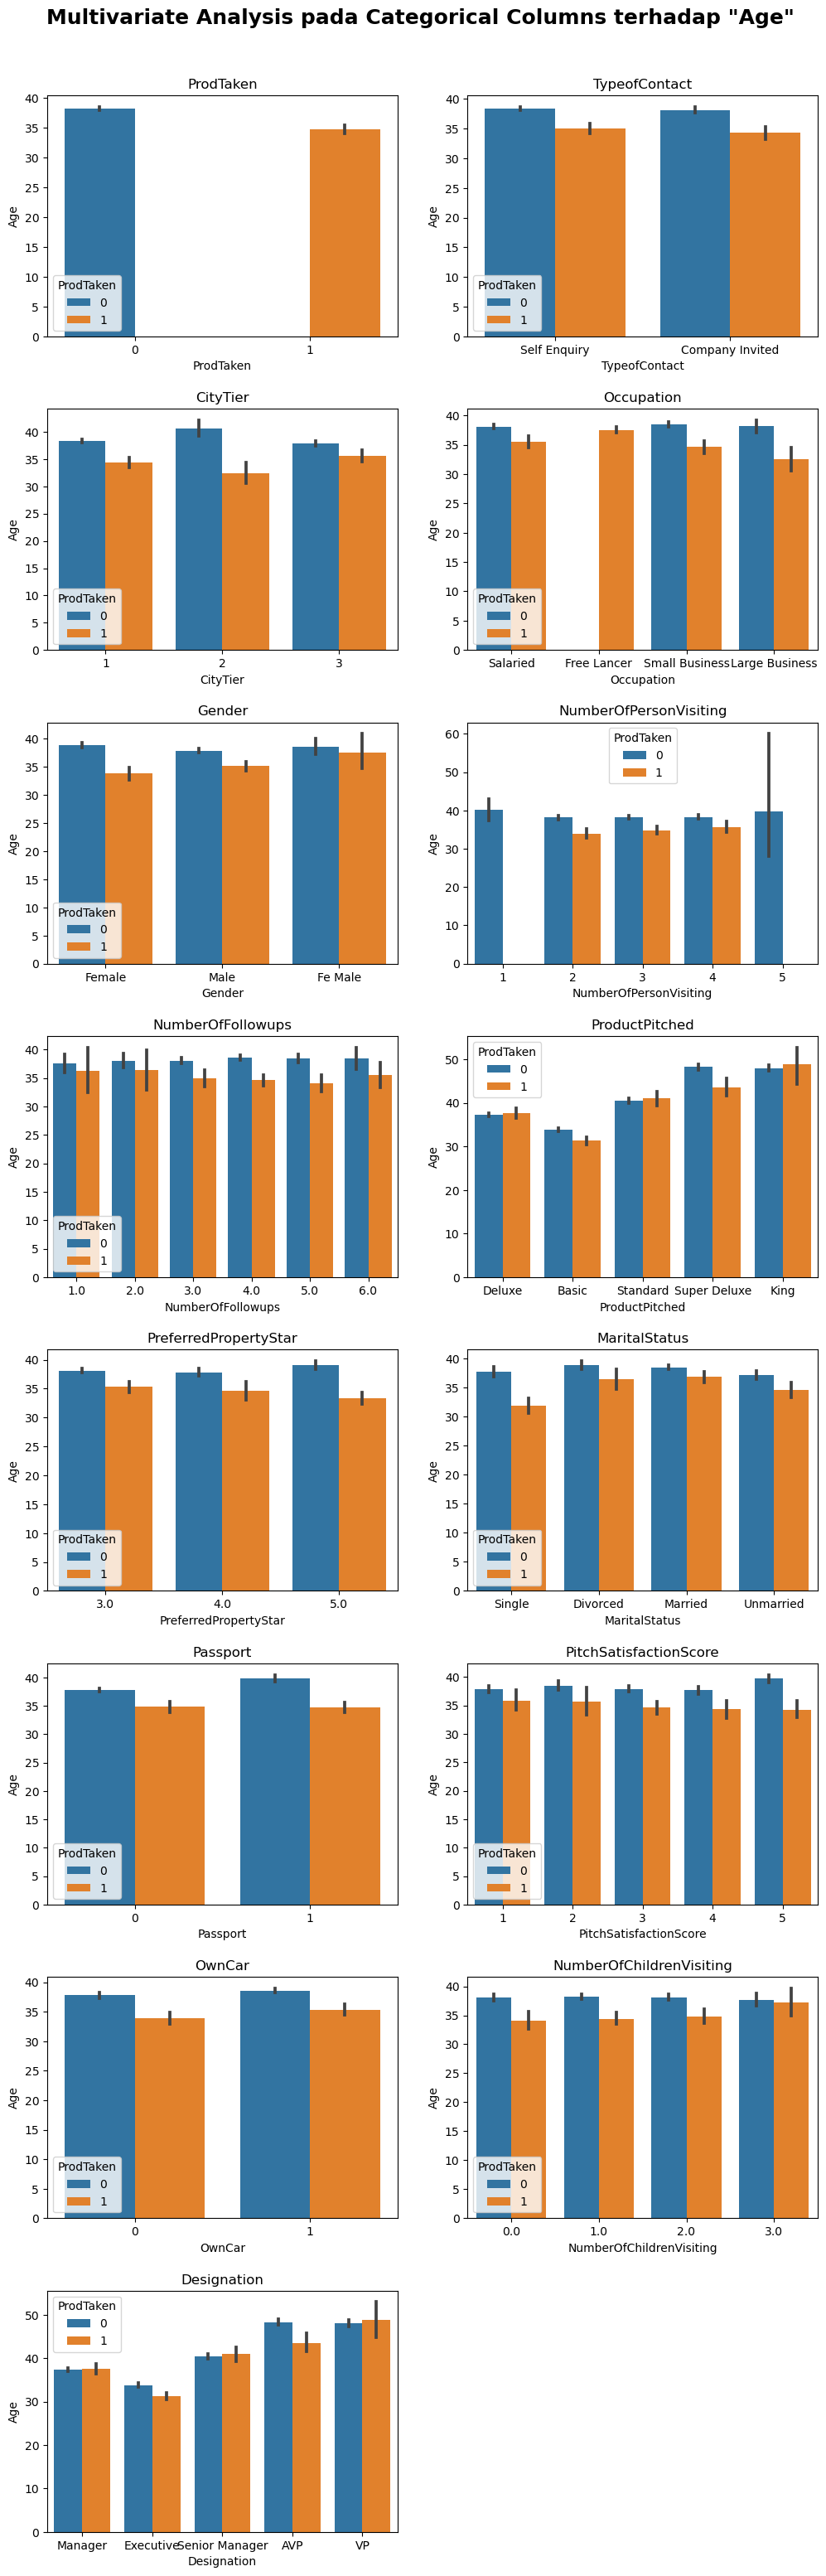

In [28]:
plt.figure(figsize=(12,35))
plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle('Multivariate Analysis pada Categorical Columns terhadap "Age"', fontsize=18, fontweight='bold')
for i in range(len(cat_cols2)):
    plt.subplot(8,2,i+1)
    sns.barplot(x=cat_cols2[i], y=df['Age'], hue='ProdTaken', data=df)
    plt.title(cat_cols2[i])
    

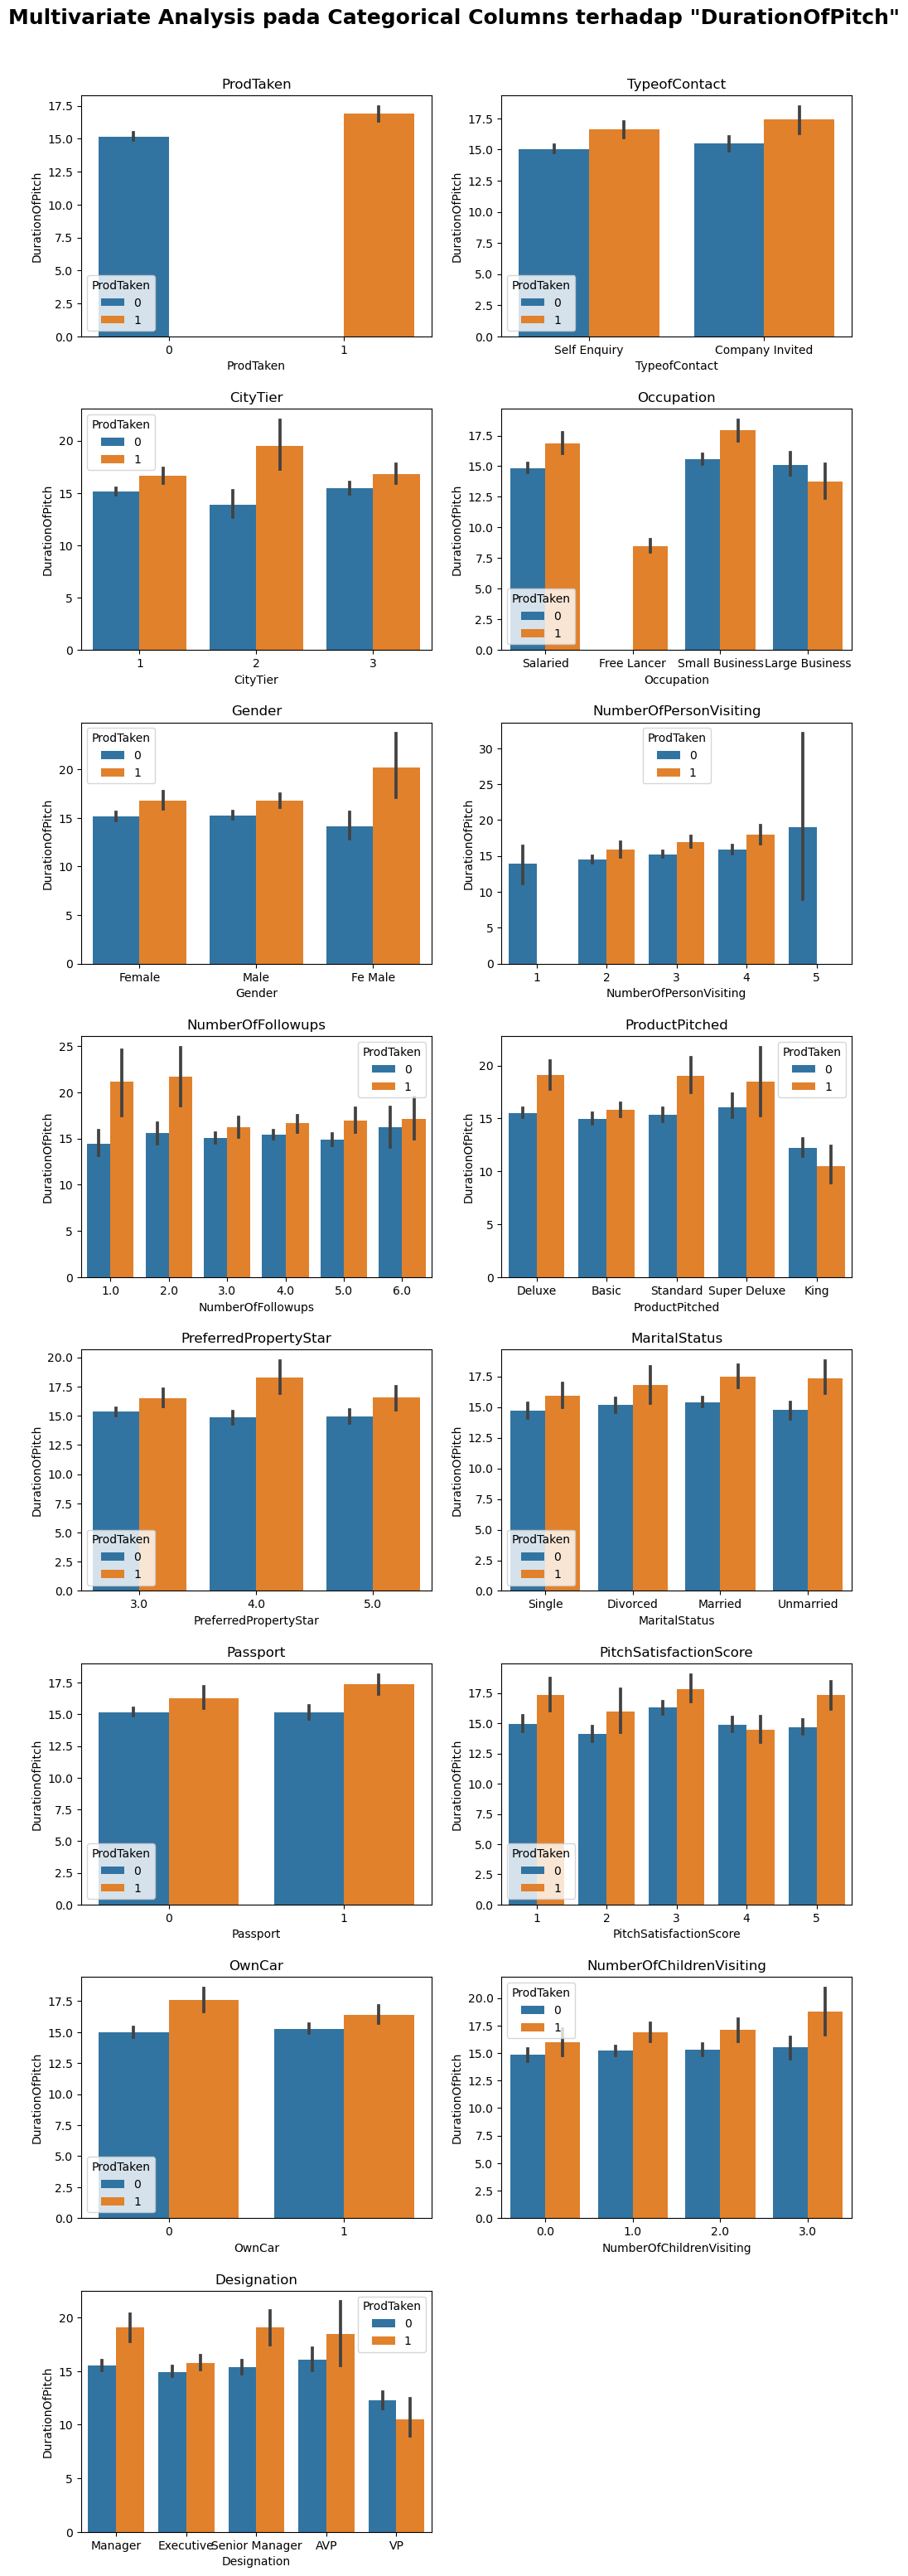

In [21]:
plt.figure(figsize=(12,35))
plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle('Multivariate Analysis pada Categorical Columns terhadap "DurationOfPitch"', fontsize=18, fontweight='bold')
for i in range(len(cat_cols2)):
    plt.subplot(8,2,i+1)
    sns.barplot(x=cat_cols2[i], y=df['DurationOfPitch'], hue='ProdTaken', data=df)
    plt.title(cat_cols2[i])
    

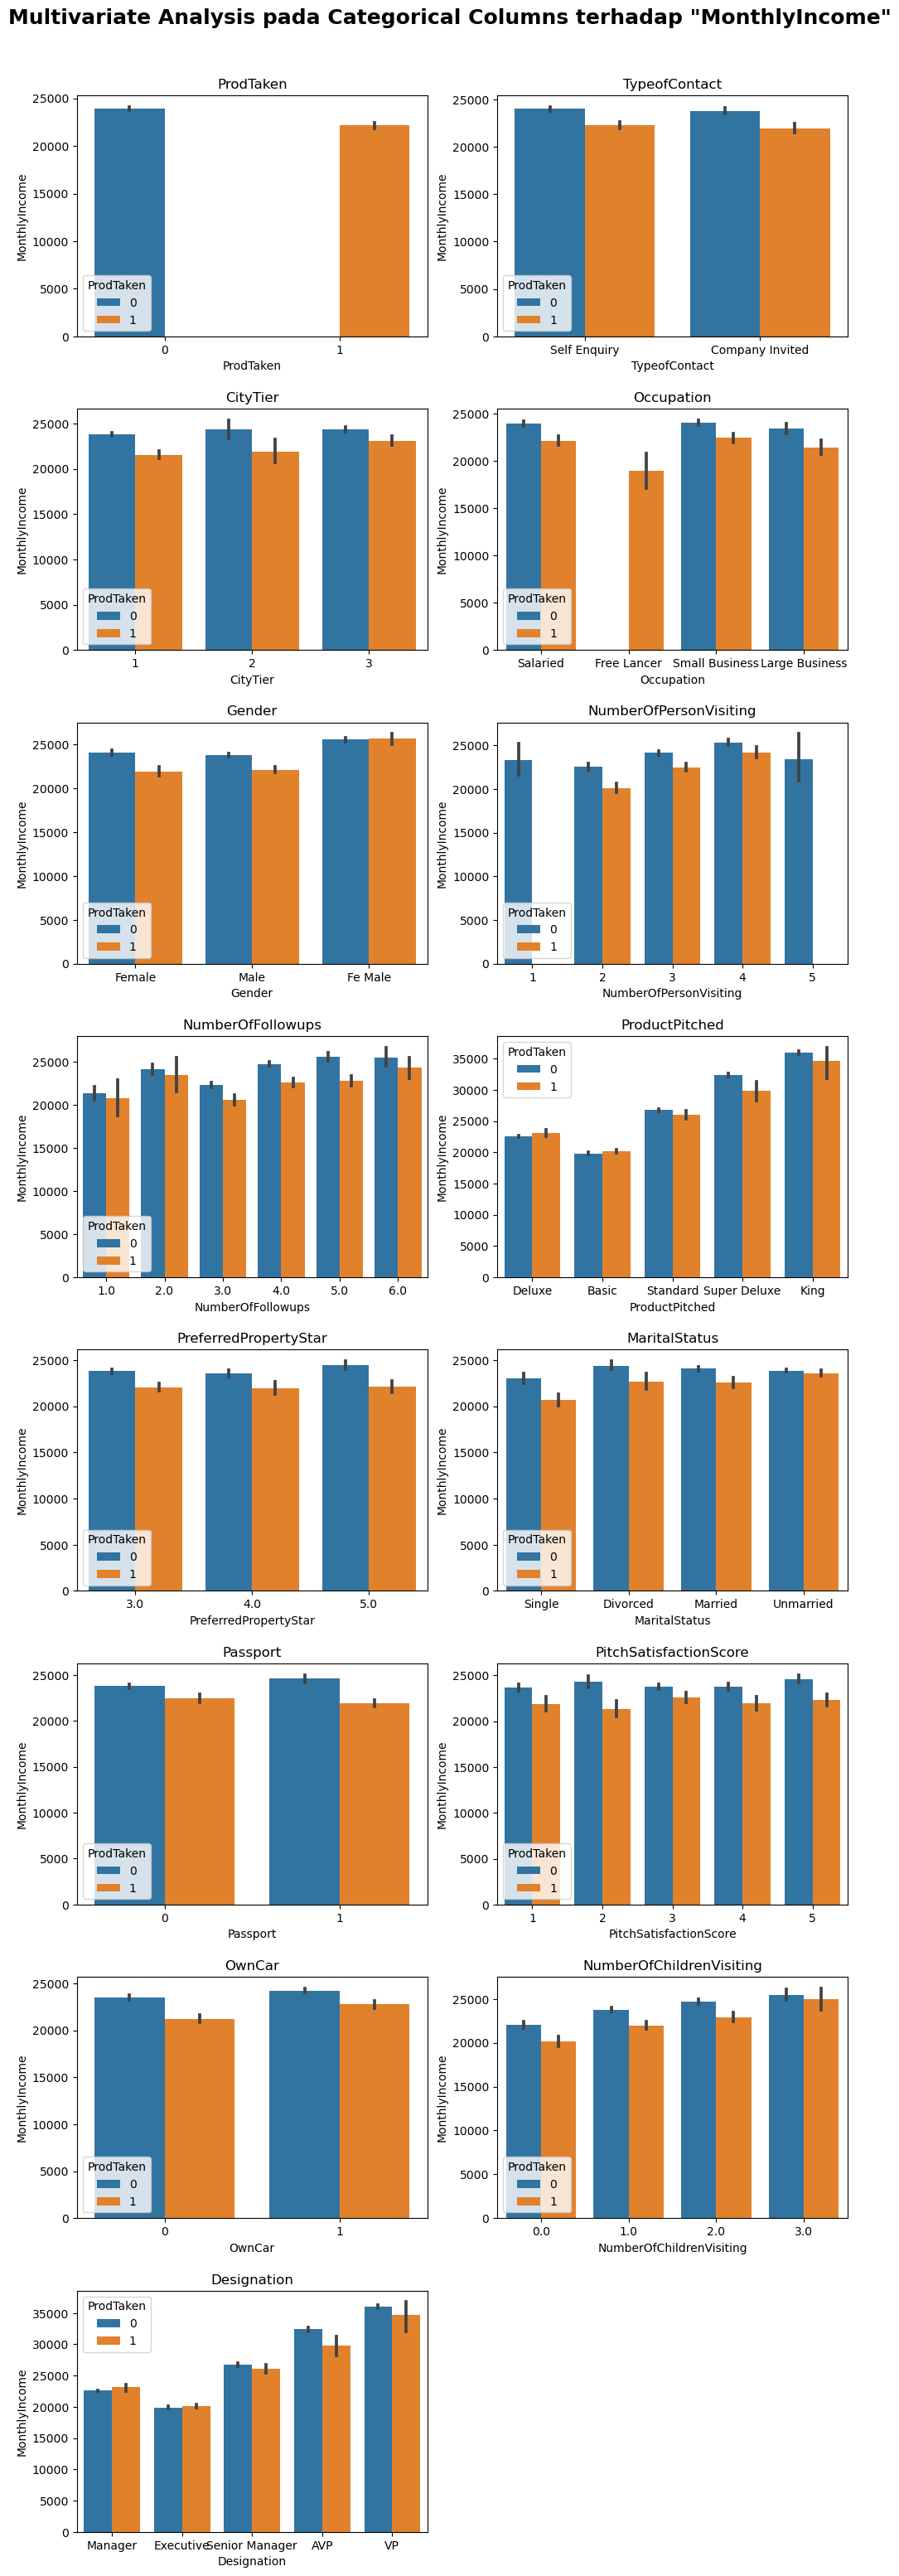

In [22]:
plt.figure(figsize=(12,35))
plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle('Multivariate Analysis pada Categorical Columns terhadap "MonthlyIncome"', fontsize=18, fontweight='bold')
for i in range(len(cat_cols2)):
    plt.subplot(8,2,i+1)
    sns.barplot(x=cat_cols2[i], y=df['MonthlyIncome'], hue='ProdTaken', data=df)
    plt.title(cat_cols2[i])
    

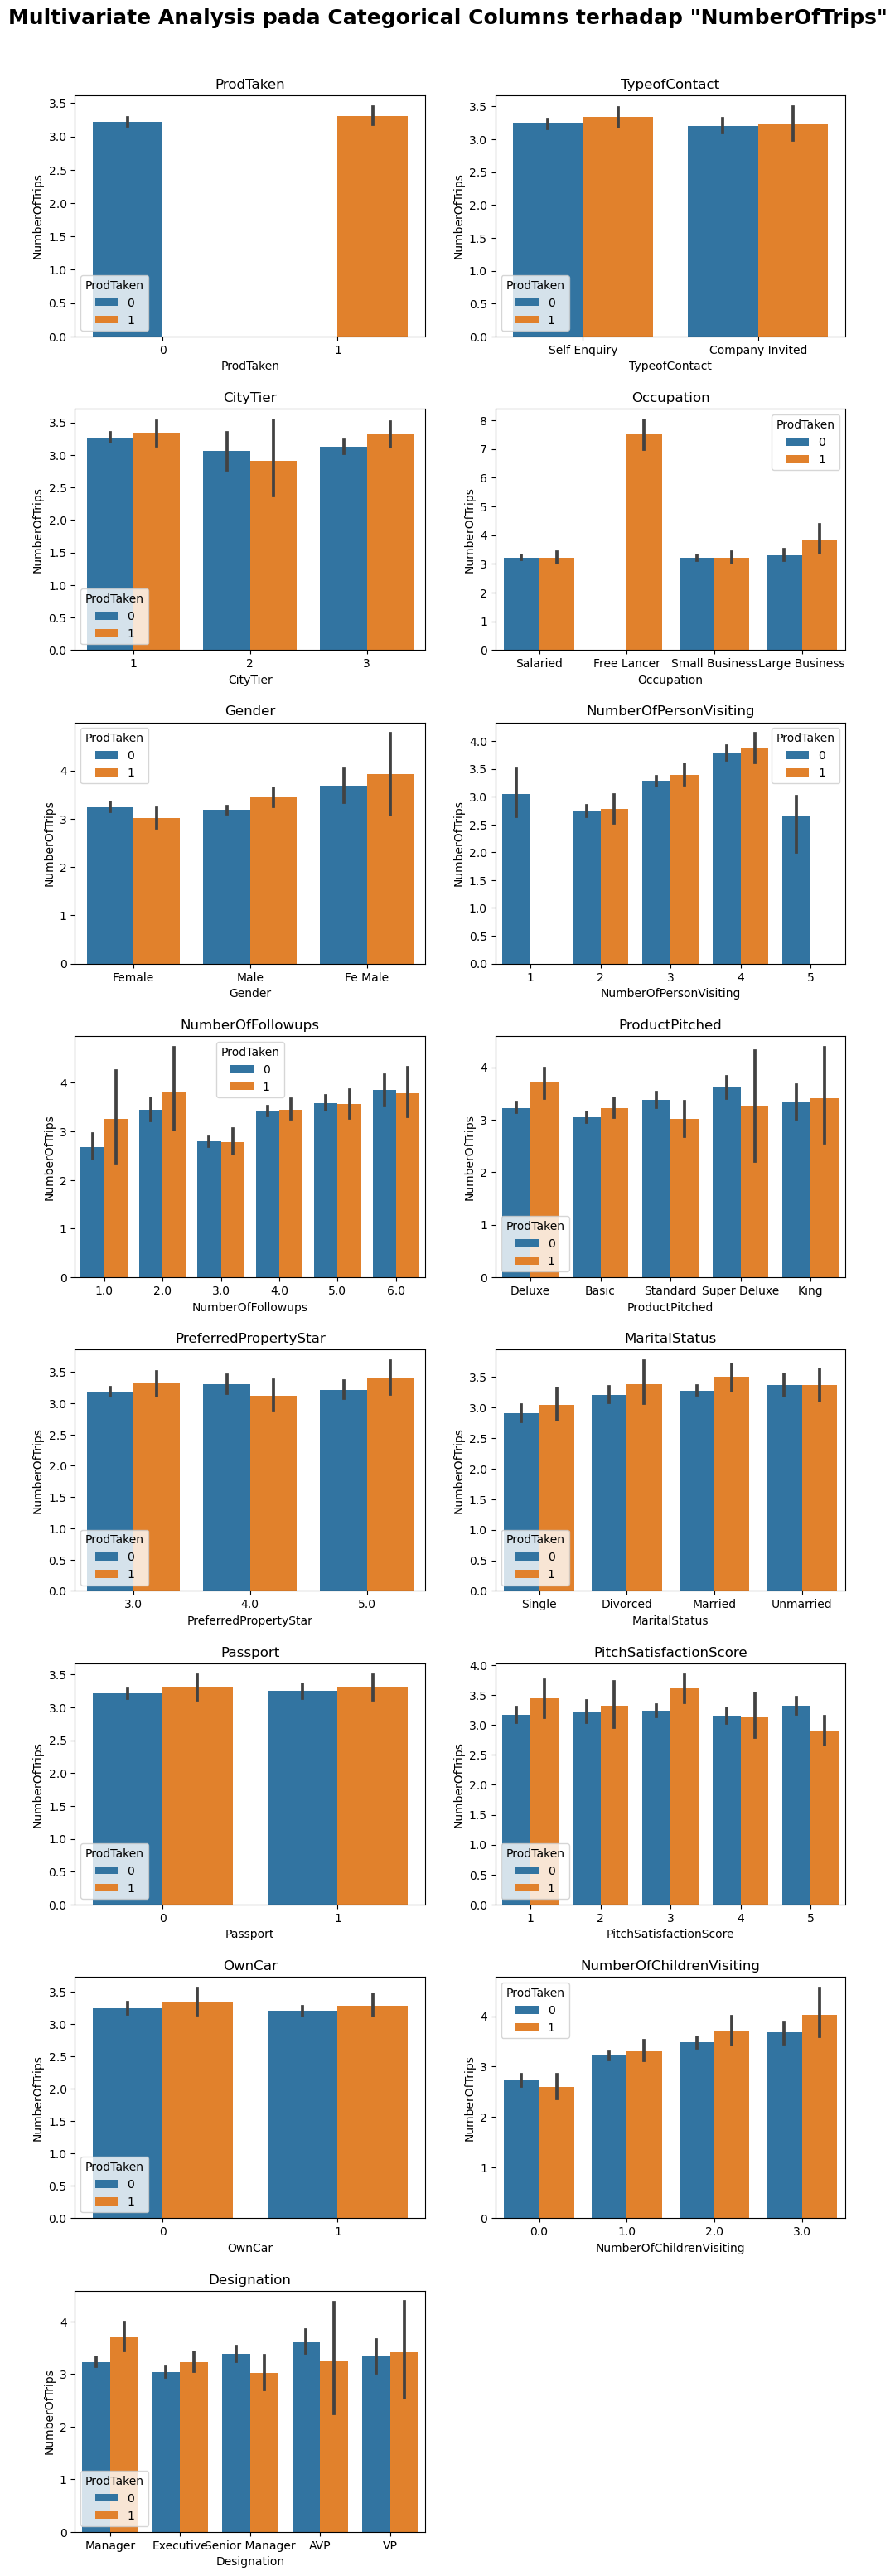

In [23]:
plt.figure(figsize=(12,35))
plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle('Multivariate Analysis pada Categorical Columns terhadap "NumberOfTrips"', fontsize=18, fontweight='bold')
for i in range(len(cat_cols2)):
    plt.subplot(8,2,i+1)
    sns.barplot(x=cat_cols2[i], y=df['NumberOfTrips'], hue='ProdTaken', data=df)
    plt.title(cat_cols2[i])
    

In [29]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

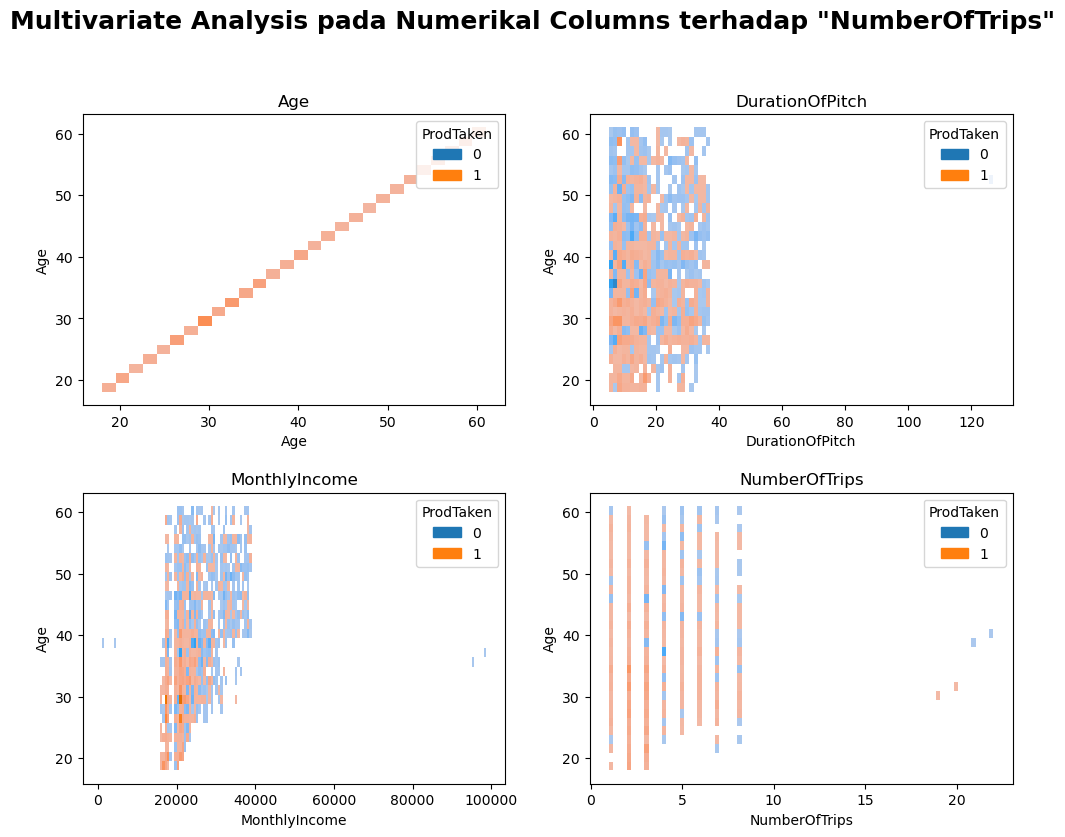